# Advanced Statistical Analysis

This notebook performs statistical analysis on the cleaned data from data_processor.ipynb to uncover meaningful insights through various statistical methods.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('../data_processing/cleaned_data.csv')
df

,title,price,rating,availability
0,a light in the attic,51.77,3,in stock
1,tipping the velvet,53.74,1,in stock
2,soumission,50.10,1,in stock
3,sharp objects,47.82,4,in stock
4,sapiens a brief history of humankind,54.23,5,in stock
...,...,...,...,...
995,alice in wonderland alices adventures in wonde...,55.53,1,in stock
996,ajin demihuman volume 1 ajin demihuman 1,57.06,4,in stock
997,a spys devotion the regency spies of london 1,16.97,5,in stock
998,1st to die womens murder club 1,53.98,1,in stock


## Descriptive Statistics Overview

In [30]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].describe()

,price,rating
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


## Price Distribution Analysis

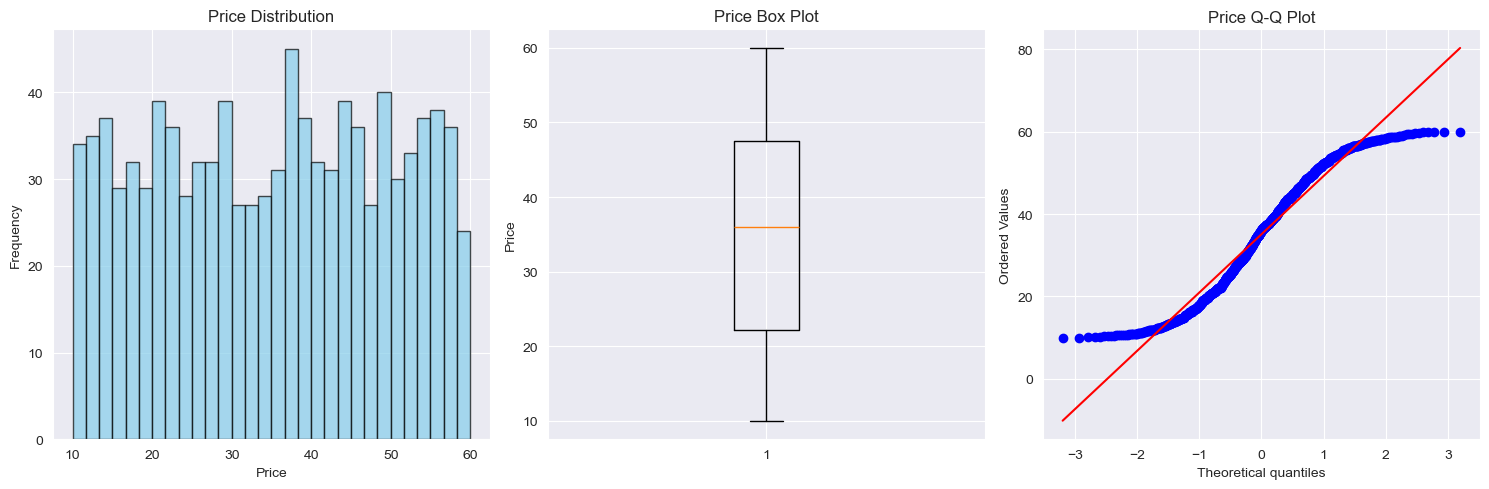

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(df['price'])
plt.title('Price Box Plot')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('Price Q-Q Plot')

plt.tight_layout()
plt.show()

In [32]:
price_stats = {
    'Mean': df['price'].mean(),
    'Median': df['price'].median(),
    'Standard Deviation': df['price'].std(),
    'Skewness': df['price'].skew(),
    'Kurtosis': df['price'].kurtosis()
}

for stat, value in price_stats.items():
    print(f"{stat}: {value:.3f}")

Mean: 35.070
Median: 35.980
Standard Deviation: 14.447
Skewness: -0.038
Kurtosis: -1.210


## Correlation Analysis

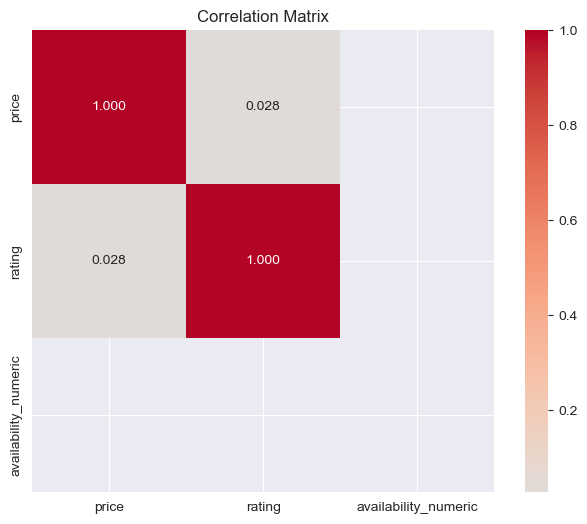

,price,rating,availability_numeric
price,1.000000,0.028166,NaN
rating,0.028166,1.000000,NaN
availability_numeric,NaN,NaN,NaN


In [33]:
# Fix: Filter only numeric columns for correlation analysis
correlation_cols = ['price', 'rating']  # Remove 'availability' as it's categorical
available_cols = [col for col in correlation_cols if col in df.columns and df[col].dtype in ['int64', 'float64']]

# Alternative: If you want to include availability, convert it to numeric first
if 'availability' in df.columns:
    # Create a numeric version of availability
    df['availability_numeric'] = df['availability'].apply(
        lambda x: 1 if 'in stock' in str(x).lower() else 0
    )
    # Add it to correlation analysis
    correlation_cols.append('availability_numeric')
    available_cols = [col for col in correlation_cols if col in df.columns and df[col].dtype in ['int64', 'float64']]

correlation_matrix = df[available_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

## Insights Summary

In [34]:
insights = []

if 'price' in df.columns:
    price_skew = df['price'].skew()

    skew_direction = "right-skewed" if abs(price_skew) > 1 else "left-skewed"
    insights.append(f"Price distribution is {skew_direction} (skewness: {price_skew:.3f})")

    price_cv = df['price'].std() / df['price'].mean()
    if price_cv > 0.5:
        insights.append(f"High price variability detected (CV: {price_cv:.3f}) - suggests diverse price ranges")

if len(available_cols) > 1:
    max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
    max_corr = max_corr[max_corr < 1.0].iloc[0]
    if max_corr > 0.7:
        insights.append(f"Strong correlation detected (r={max_corr:.3f}) between variables")

print("Key Statistical Insights:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

if not insights:
    print("No significant statistical patterns detected in the current analysis.")


Key Statistical Insights:
1. Price distribution is left-skewed (skewness: -0.038)
